In [1]:
from matplotlib import pyplot as plt
from matplotlib import rc

rc('font',**{'family':'Times New Roman'})
rc('mathtext', fontset='dejavusans')

In [2]:
fid = [18.61,
10.99,
7.04,
5.00,
4.04,
3.72,
3.77,
5.08,
13.72,
25.57,
39.00,
47.96,
78.44,
163.59,
226.56,
256.92,
273.75,
292.27,
314.75,
334.18,
349.49,
378.68,
425.39,
446.16,
448.95, 449.38, 449.00]

In [3]:
timestep = [1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

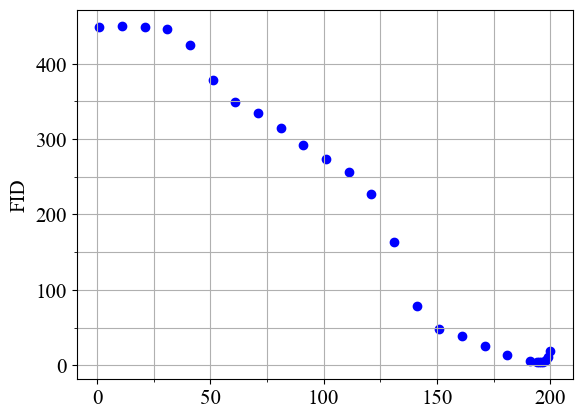

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

major_xticks = [0, 50, 100, 150, 200]
minor_xticks = [0, 25, 50, 75, 100, 125, 150, 175, 200]

major_yticks = [0, 100, 200, 300, 400]
minor_yticks = [0, 50, 100, 150, 200, 250, 300, 350, 400]
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks, minor=True)
ax.set_yticks(major_yticks)
ax.set_yticks(minor_yticks, minor=True)
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 30,
        }
ax.set_ylabel("FID", fontdict=font)
ax.grid(which='both')
ax.scatter([201-i for i in timestep], fid, c="blue")
plt.savefig("FID.png")

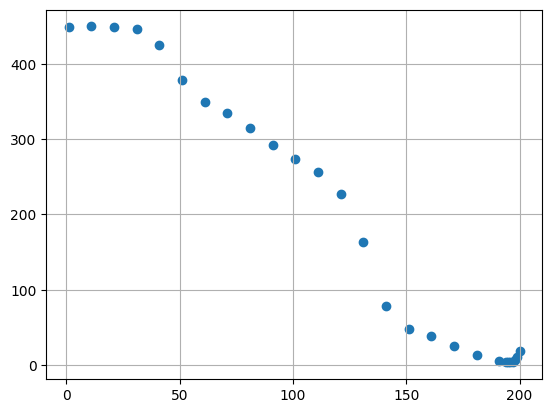

In [12]:
plt.scatter([201-i for i in timestep], fid)
plt.xticks([0, 50, 100, 150, 200])
plt.grid(which='both')